# Video Game Dataset

### About Dataset
This Dataset provides up-to-date information on the sales performance and popularity of various video games worldwide. The data includes the name, platform, year of release, genre, publisher, and sales in North America, Europe, Japan, and other regions. It also features scores and ratings from both critics and users, including average critic score, number of critics reviewed, average user score, number of users reviewed, developer, and rating. This comprehensive and essential dataset offers valuable insights into the global video game market and is a must-have tool for gamers, industry professionals, and market researchers.

- The descriptions of the columns in the dataset are as follows:
  - **Name**: The name of the video game.
  - **Platform**: The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.
  - **Year_of_Release**: The year in which the game was released.
  - **Genre**: The genre of the video game, such as action, adventure, sports, etc.
  - **Publisher**: The company responsible for publishing the game.
  - **NA_Sales**: The sales of the game in North America.
  - **EU_Sales**: The sales of the game in Europe.
  - **JP_Sales**: The sales of the game in Japan.
  - **Other_Sales**: The sales of the game in other regions.
  - **Global_Sales**: The total sales of the game across the world.


#### Objectives
- Identify the most significant variables or combination of variables in predicting global sales of video games, supported by quantitative justifications.
- Analyze the impact of the number of critics, users, and their review scores on video game sales in North America, EU, and Japan.
- Justify the choice of regression model for the task, providing quantitative reasons for the selection.
- Evaluate the performance of relevant categorical variables in classifying the dataset, identify the best-performing variable, and identify if it overfits.
- Assess the practical deployability of the classification models based on their performance.
- Determine the categorical variable that best describes the groups formed using relevant non-categorical variables in the video game dataset, using internal and external evaluation metrics.


### Import the initial necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
# read the dataset
data = pd.read_csv("Video_Games.csv" )

### Explore the dataset for errors

In [822]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


- User_Score is a text

In [823]:
# check for missing values
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [824]:
# display some descriptive statistics of the data
#df.describe(include='all')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [4]:
# select only the features that are object data types and observe

categorical_dataframe = data.select_dtypes(include=[np.object])
categorical_summary = categorical_dataframe.describe()


C:\Users\MREVAN~1\AppData\Local\Temp/ipykernel_16092/1660678470.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_dataframe = data.select_dtypes(include=[np.object])


#### Explore each variable to note the issue with each varaible


##### Printing all the categories with their counts

In [8]:
# for col in categorical_dataframe:
#     print(data[col].value_counts())
#     print("-" * 50)

- Text in User_Score column: "tbd"

### Data Cleaning



In [827]:
data['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [828]:
data['Critic_Count'].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [829]:
# we can decide to fill all rows with no critic score and critic count with zero.
# justified because there's no zero in the min

data['Critic_Score'].fillna(0, inplace=True)
data['Critic_Count'].fillna(0, inplace=True)

In [830]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### Treating User_Score 

In [831]:
# replace text value with NAN

data['User_Score'].replace('tbd', np.nan, inplace=True)

In [832]:
data['User_Score'].isnull().sum()

9129

This is equal to the User_count

In [833]:
# convert the data type to appropriate data type
data['User_Score'] = data['User_Score'].astype('float')

In [834]:
data['User_Score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

In [835]:
# we can decide to fill missing values with median value (because the minimum is zero) or drop all rows
data['User_Score'].fillna(data['User_Score'].median(), inplace=True)

In [836]:
# check the descriptive statistics
data['User_Score'].describe()

count    16719.00000
mean         7.32978
std          1.02773
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: User_Score, dtype: float64

In [837]:
data['User_Count'].describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

In [838]:
data['User_Count'].fillna(0, inplace=True)

In [839]:
data['User_Count'].describe()

count    16719.000000
mean        73.648245
std        386.695153
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max      10665.000000
Name: User_Count, dtype: float64

#### Treating Rating

In [840]:
# we can fill the NAN in Rating with "unknown"

data['Rating'].fillna('No rating', inplace= True)

#### Treating Genre

In [841]:
# we can drop the few rows missing

df.dropna(subset=['Genre'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [842]:
# Sanity Check
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6623
Rating                0
dtype: int64

### Selecting the top platforms with threshold=1000


In [843]:
data['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [844]:
# set threshold to 1000
threshold = 1000

# get the value count of platforms
val_count = data["Platform"].value_counts()


# filter the platforms to only those with at least 1000 occurrence
platform_list = val_count[val_count.values >= threshold].index.tolist()

In [845]:
platform_val = []

for i in range(data.shape[0]):  # iterate over all rows in data
    txt = data.Platform.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in platform_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            platform_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        platform_val.append("Others")

In [846]:
data["Platform_primary"] = platform_val

In [847]:
# sanity check: 
data["Platform_primary"].value_counts()

Others    4595
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: Platform_primary, dtype: int64

In [848]:
data['Platform_primary'].value_counts()

Others    4595
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: Platform_primary, dtype: int64

#### Data Visualization

##### Univariate Analysis: Numerical Features


In [849]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

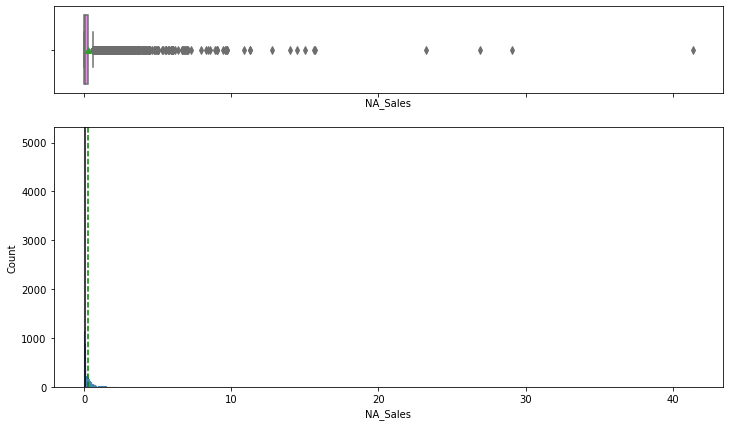

In [851]:
histogram_boxplot(data=data, feature='NA_Sales')

The visualization is right skewed; there are outliers

Second plot:
1. It's not entirely skewed
2. Mean is close to the median
3. Mean is the green line, black line is the black line
4. Since they are closed we can say they are entirely skewed, but a lot of outliers

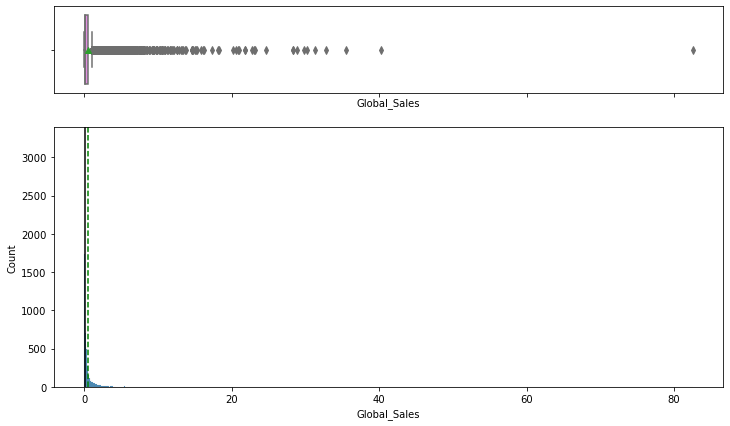

In [852]:
histogram_boxplot(data=data, feature='Global_Sales')

Assumptions of normality are made on individual variables.
It's determined on univariate.

#### Univariate Analysis: Categorical Features

In [853]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

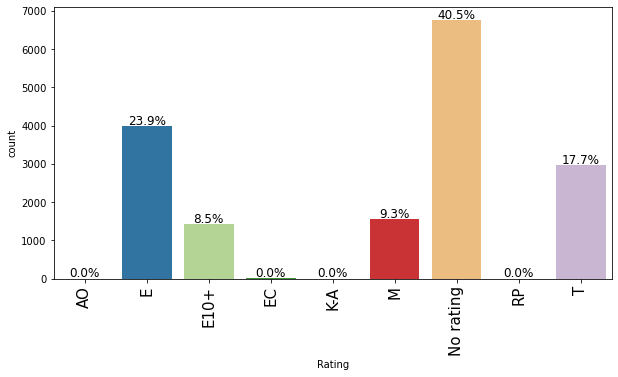

In [854]:
labeled_barplot(data=data, feature='Rating', perc=True)

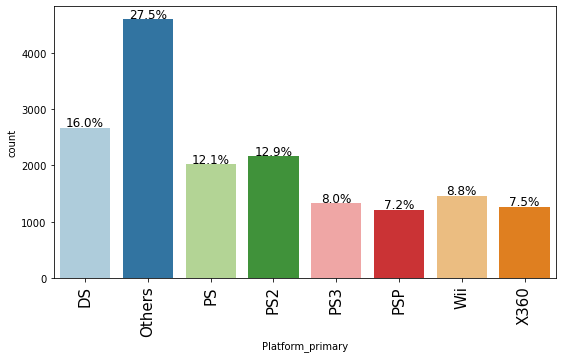

In [855]:
labeled_barplot(data=data, feature='Platform_primary', perc=True)

Explain the plot in the report to give insights. This shows the top platforms that were used the most.

#### Bivariate Analysis

In [856]:
numerical_data = data.select_dtypes(include='number')

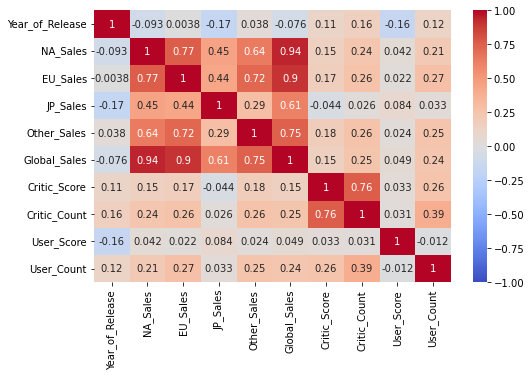

In [857]:
mat_corr = numerical_data.corr()

plt.figure(figsize=(8,5))
sns.heatmap(mat_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

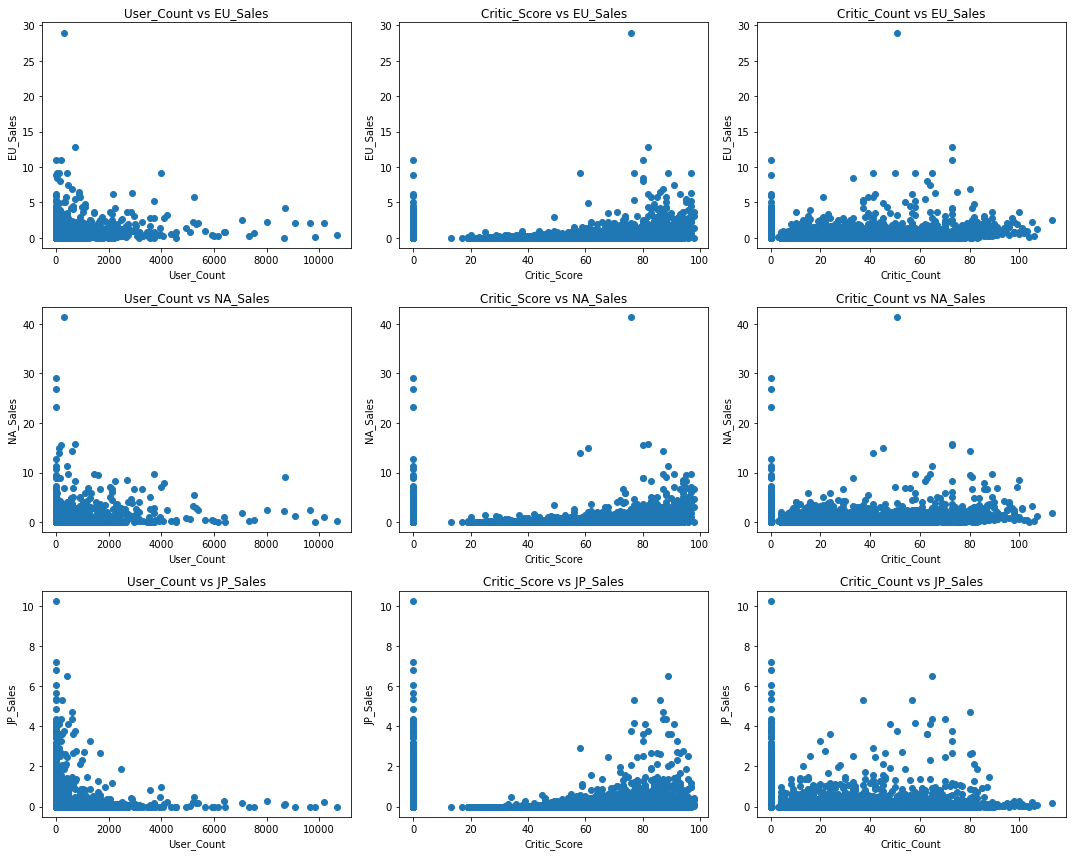

In [858]:
x_vars = ['User_Count', 'Critic_Score', 'Critic_Count']
y_vars = ['EU_Sales', 'NA_Sales', 'JP_Sales']

fig, axes = plt.subplots(nrows=len(y_vars), ncols=len(x_vars), figsize=(15, 12))

for i, y_var in enumerate(y_vars):
    for j, x_var in enumerate(x_vars):
        axes[i, j].scatter(data[x_var], data[y_var])
        axes[i, j].set_xlabel(x_var)
        axes[i, j].set_ylabel(y_var)
        axes[i, j].set_title(f'{x_var} vs {y_var}')
        axes[i, j].grid(False)

plt.tight_layout()
plt.show()

In [859]:
# Function to create scatterplot between two numerical features

def custom_scatterplot(x, y, title, data=data):
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x = x, y = y, data = data)
    plt.title(title)
    plt.show()

North America Sales vs Global Sales

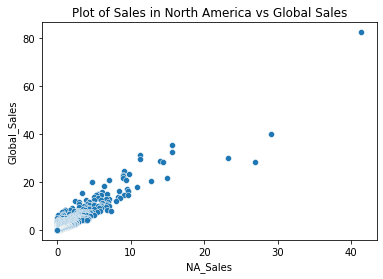

In [860]:
custom_scatterplot(x = 'NA_Sales', y = 'Global_Sales', title = 'Plot of Sales in North America vs Global Sales')

As the sales in North America increases, the Global Sales increases. This sales in North America have a positive relationship with the Global Sales and vice versa.

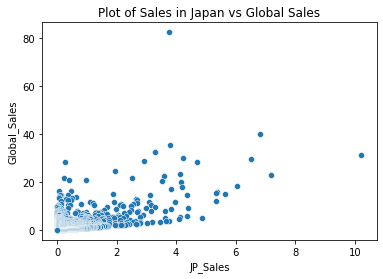

In [861]:
custom_scatterplot(x = 'JP_Sales', y = 'Global_Sales', title = 'Plot of Sales in Japan vs Global Sales')

There's no relationship to show that as sales in Japan increases, Global Sales increases.
But when we check on the heatmap plot we see the correlation is 0.61.
We can conclude that there is little to no correlation between Japan Sales and Global Sales.

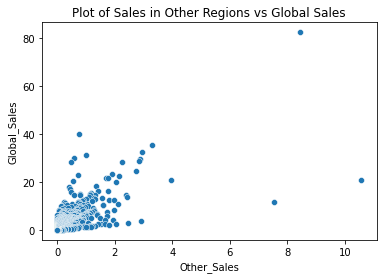

In [862]:
custom_scatterplot(x = 'Other_Sales', y = 'Global_Sales', title = 'Plot of Sales in Other Regions vs Global Sales')

As the sales in Other region increases, the Global Sales increases. This sales in North America have a positive relationship with the Global Sales and vice versa.
However, the relationship is weak. This correlationship can be confirm on the heatmap.

#### Hint:

Question (a): Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.

These plots are beginning to answer part of the question of the variables that contribute to the prediction of "global sales" and the ones that don't make a contributions.

Text(0.5, 1.0, 'Rating vs Global Sales')

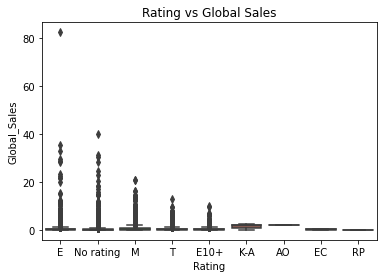

In [863]:
sns.boxplot(x = 'Rating', y = 'Global_Sales', data = data)
plt.title('Rating vs Global Sales')

We can see a lot of outliers. However, 'Rating' may contribute to the 'Global Sales' prediction.

Platform vs Global Sales

Text(0.5, 1.0, 'Top Platforms vs Global Sales')

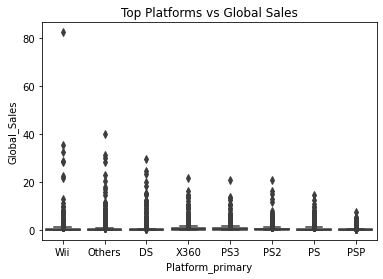

In [864]:
sns.boxplot(x = 'Platform_primary', y = 'Global_Sales', data = data)
plt.title('Top Platforms vs Global Sales')

#### Outlier Detection and Handling

We can calculate outliers by 
Lower whisker = lower quartile - 1.5x Interquartile range(IQR)(Q3-Q1). So any value below the lower whisker becomes outliers

Upper whisker = upper quartile + 

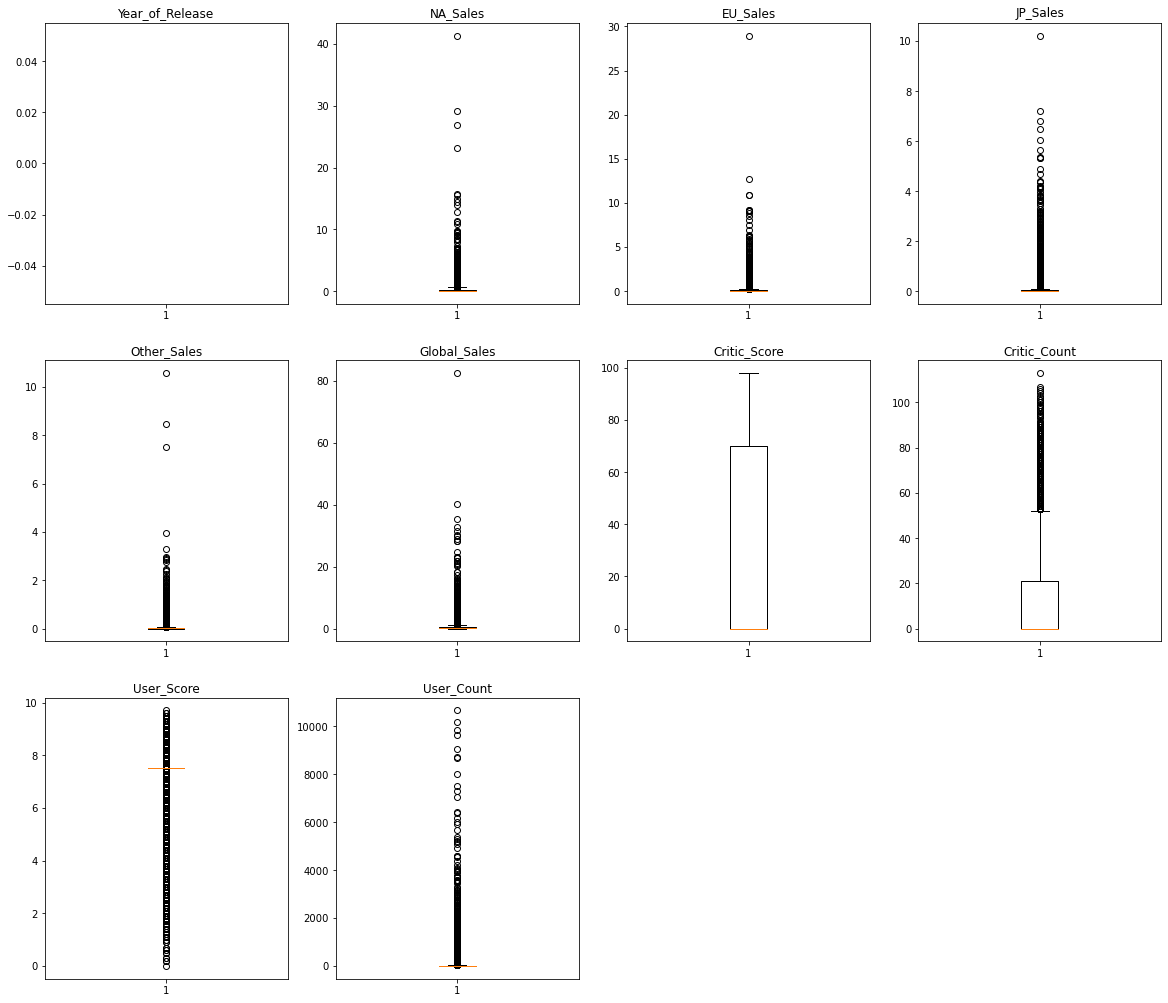

In [865]:
# outlier detection using boxplot

plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable])
    plt.title(variable)
    
plt.show()

We don't want to touch the 'Global Sales' because it's the target. We can do transformation, take log

#### Outlier Treatment

In [866]:
numerical_data.drop('Global_Sales', axis=1, inplace=True)
numerical_data.columns

C:\Users\MR EVANS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

Sample of what clip does

In [867]:
L1= [-200, 5, 0, 1000]
np.clip(L1, 0, 5)

array([0, 5, 0, 5])

In [874]:
import numpy as np

def treat_outliers(data, col):
    """
    Treat outliers in a variable.
    col: str, name of the numerical variable
    df: DataFrame
    """
    Q1 = data[col].quantile(0.25)   # lower (25th) quartile
    Q3 = data[col].quantile(0.75)   # upper (75th) quartile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    data[col] = np.clip(data[col], lower_whisker, upper_whisker)
    return data

def treat_outliers_all(data, col_list):
    """
    This will treat all outliers, looping
    through all the variables and passing them
    into the treat_outliers function.
    """
    for c in col_list:
        data = treat_outliers(data, c)
    return data


In [876]:
data = treat_outliers_all(data, numerical_data)

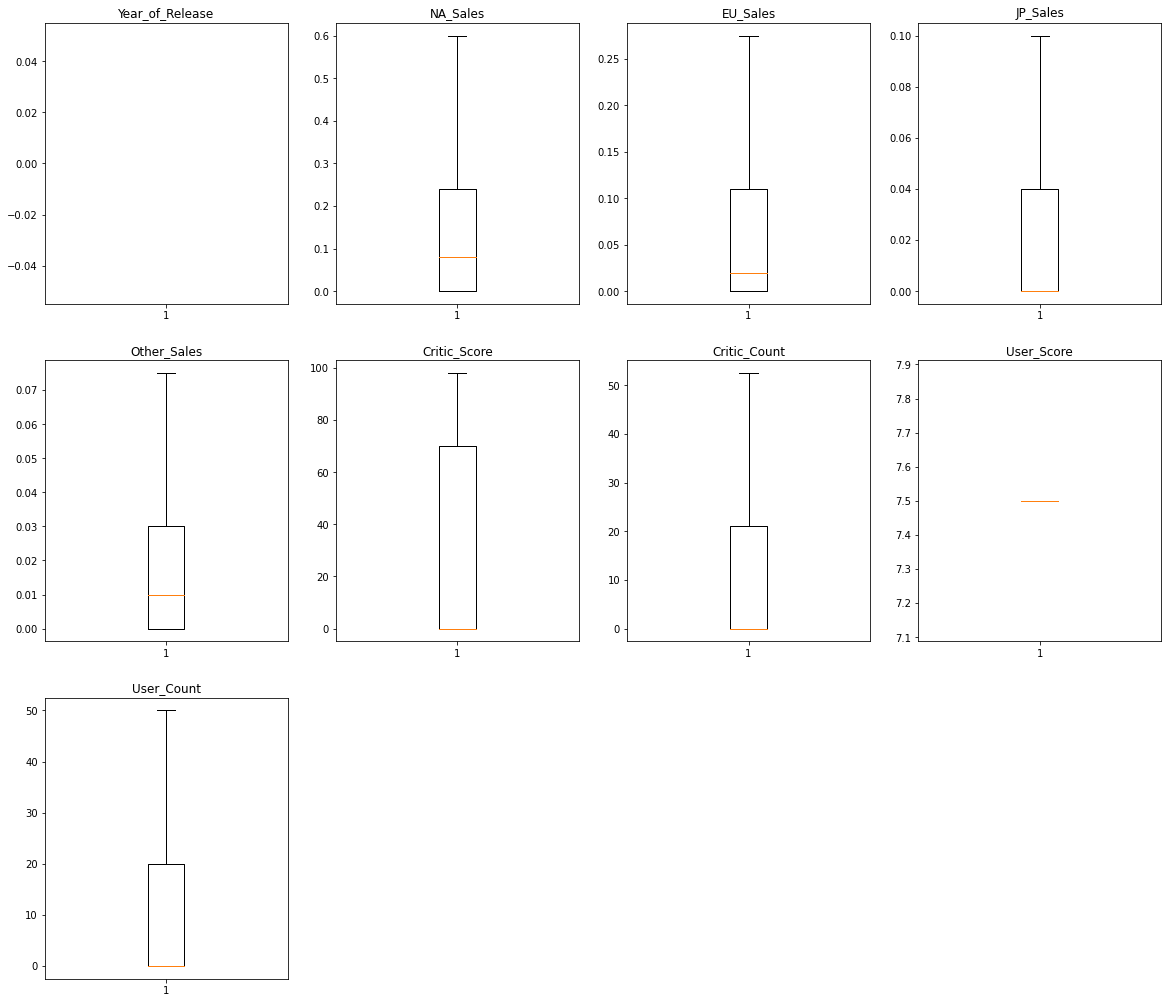

In [877]:
# outlier detection using boxplot

plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)
    
plt.show()

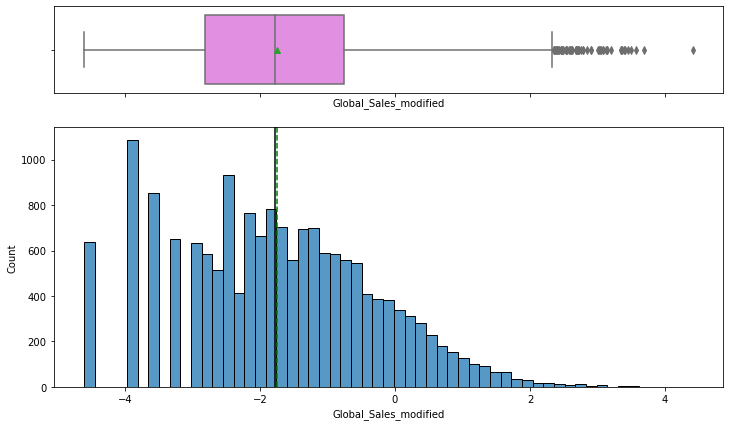

In [878]:
# suppose we want to transform the target using log transformation
# meaning making a right skew or left skew normal

data['Global_Sales_modified'] = np.log(data['Global_Sales']) + 1e-6

histogram_boxplot(data = data, feature = 'Global_Sales_modified')

We can see the green line and black line. This makes variable almost normal

#### Model Building

In [879]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [880]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Platform_primary', 'Global_Sales_modified'],
      dtype='object')

In [881]:
# Select features and target
X = data[['Genre', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count', 'User_Score', 
        'User_Count', 'Rating', 'Platform_primary']]

y = data['Global_Sales_modified'] # + 1e-10 #

In [882]:
X.isnull().sum()

Genre               2
NA_Sales            0
JP_Sales            0
EU_Sales            0
Other_Sales         0
Critic_Count        0
User_Score          0
User_Count          0
Rating              0
Platform_primary    0
dtype: int64

In [883]:
# convert all categorical features to numerical data: OneHotEncoding

X = pd.get_dummies(X, drop_first=True)
X.head()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,User_Score,User_Count,Genre_Adventure,Genre_Fighting,Genre_Misc,...,Rating_No rating,Rating_RP,Rating_T,Platform_primary_Others,Platform_primary_PS,Platform_primary_PS2,Platform_primary_PS3,Platform_primary_PSP,Platform_primary_Wii,Platform_primary_X360
0,0.6,0.1,0.275,0.075,51.0,7.5,50.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.6,0.1,0.275,0.075,0.0,7.5,0.0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0.6,0.1,0.275,0.075,52.5,7.5,50.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.6,0.1,0.275,0.075,52.5,7.5,50.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.6,0.1,0.275,0.075,0.0,7.5,0.0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


============================================================

### Cross-Validation

In [884]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedGroupKFold
from sklearn.linear_model import LinearRegression

In [885]:
linear_reg_cross_val = LinearRegression()

kfold = KFold(shuffle=True)

scores = cross_val_score(lin_reg, X, y, cv=kfold, scoring='r2')
scores

array([0.81491221, 0.81127073, 0.82498491, 0.81270336, 0.81257282])

In [886]:
np.mean(scores)

0.8152888058875554

=======================================================================

In [887]:
# split the data into training and testing
# Now, you have training (x_train_temp, y_train_temp), validation (x_val, y_val), and test (x_test, y_test) sets

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

In [888]:
X_train.shape

(10700, 33)

In [889]:
X_test.shape

(3344, 33)

In [890]:
X_val.shape

(2675, 33)

In [891]:
# Normalize the data

scaler = StandardScaler()

# Use scaler to transform the data. Fit will calculate the mean and standard deviation of each of the variable
# The transform will use the mean and std to transform the data so that the mean will shifted towards zero and 
# the standard deviation towards 1

# Perform fit_transform on only the training data
# We dont want to recalculate the mean and std on the validation data so we use only transform. 
# If we recalcualte then we are violating the assumption of linear regression

X_train_sd = scaler.fit_transform(X_train)
X_val_sd = scaler.transform(X_val)
X_test_sd = scaler.transform(X_test)


In [892]:
# Build the linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X_train_sd, y_train)

LinearRegression()

#### Model Performance Check

In [893]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [894]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    data_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return data_perf

In [895]:
# Read on adj_r2 (something about penalizing), 
# what r2 is measuring

###### Interpreting Model Performance and Coefficients

In [896]:
lin_reg_train = model_performance_regression(lin_reg, X_train_sd, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.629634,0.495566,0.816197,0.815628,86860.097039


81% of the variations or changes in the Global Sales was explained by all the features in our data.
inf because of the log. It's possible one of the data is close to zero

In [897]:
lin_reg_val = model_performance_regression(lin_reg, X_val_sd, y_val)
lin_reg_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.221366e+10,2.361478e+08,-7.067573e+19,-7.155885e+19,3.536056e+10


Is the model underfitting, overfitting or generalizing? Why?

This model is not overfitting. The performance of the training is similar to the validation. Adj. R-squared for training is approximately 82, and approximately 81 for validation. The difference isn't much. If the difference was much, then we can saw the model is overfitting.

However, we can have a more reliable result after we resolve the issue of multicollinearity using the Lasso and Ridge.

In [898]:
# Always try interpreting coefficients

print(lin_reg.coef_)
print(X_train.columns)

[ 6.71030922e-01  4.36558042e-01  2.57054039e-01  4.18886270e-01
  4.11520636e-02  3.03145510e+11 -1.34973449e-01 -8.51094690e-02
 -2.41211340e-03  2.50424832e-02  1.19158216e-02 -8.76198159e-03
  1.72145420e-02  1.30648326e-02 -3.64993492e-03  7.37732870e-03
  5.67604188e-02 -7.39066369e-03 -2.66928683e+11 -1.77000045e+11
 -1.36520977e+10 -8.63555562e+09 -1.86237602e+11 -3.10326053e+11
 -1.05758581e+10 -2.41303031e+11  9.66941028e-02  1.86500181e-02
  1.68589423e-02 -8.64426564e-03 -4.42507324e-02  2.24032348e-02
  3.46806472e-02]
Index(['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count',
       'User_Score', 'User_Count', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+',
       'Rating_EC', 'Rating_K-A', 'Rating_M', 'Rating_No rating', 'Rating_RP',
       'Rating_T', 'Platform_pri

In [899]:
for i, col in enumerate(X_train.columns):
    print(f"{col} has coefficient of {np.exp(lin_reg.coef_[i])}")

NA_Sales has coefficient of 1.9562530260495679
JP_Sales has coefficient of 1.5473720526008565
EU_Sales has coefficient of 1.2931150028688445
Other_Sales has coefficient of 1.5202674444129953
Critic_Count has coefficient of 1.0420105453522317
User_Score has coefficient of inf
User_Count has coefficient of 0.8737391103382205
Genre_Adventure has coefficient of 0.9184117413223248
Genre_Fighting has coefficient of 0.9975907934085088
Genre_Misc has coefficient of 1.025358680115656
Genre_Platform has coefficient of 1.0119870977798135
Genre_Puzzle has coefficient of 0.9912762927043046
Genre_Racing has coefficient of 1.0173635661195628
Genre_Role-Playing has coefficient of 1.0131505504111162
Genre_Shooter has coefficient of 0.9963567179971633
Genre_Simulation has coefficient of 1.0074046082325434
Genre_Sports has coefficient of 1.0584022067913943
Genre_Strategy has coefficient of 0.9926365801090532
Rating_E has coefficient of 0.0
Rating_E10+ has coefficient of 0.0
Rating_EC has coefficient of 0

C:\Users\MREVAN~1\AppData\Local\Temp/ipykernel_12296/3862151034.py:2: RuntimeWarning: overflow encountered in exp
  print(f"{col} has coefficient of {np.exp(lin_reg.coef_[i])}")


In [900]:
np.exp(0.664144295)

1.942827322780418

This can be interpreted by saying for one unit video game sale in North America, the Global Sales
will increase by 1.94 times

In [901]:
np.exp(-0.0787374387)

0.9242825734226225

In [902]:
# Interprete some of these coefficients in the report.

### Ridge Regression - Handling the Multicollinearity Issue

1. Ridge regression is also a linear model for regression. In Ridge regression, the coefficients w are chosen not only so that they predict well on the training data, but there is an additional constraint. We also want the magnitude of coefficients to be as small as possible, in other words, all entries of w should be close to 0.
2. This constraint is an example of what is called regularization. Regulization means explicitly restricting a model to avoid overfitting.


It shrinks high-impact coefficients to nearly zero (reducing the impact of those variables to the target)

Used to estimate regression models in cases of multicollinearity

#### The only difference between Ridge regression and Lasso regression is it sets the little impact features to zero.

#### How to Resolve Multicollinearity

1. Remove some of the highly correlated independent variables
2. Linearly combine the independent variables, such as adding them together
3. Regularization (How do handle the problem of overfitting in Linear regression?)

#### Feature Selection 

Process of selecting the most important features to build a machine learning model.
The aim is to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable

##### Why should we do feature selection
1. Reduces dimensionality
2. Discards deceptive features (deceptive features appear to aid learning on the training set, but impair generalization)
3. Speeds training/testing

##### Feature Selection Methods
1. Forward Selection
2. Backward Selection
3. Lasso Regression
4. Select Best K features
5. Correlation Coefficient
6. Variance Threshold

##### Forward Feature Selection
This is an iterative method in which we start with the best performing variable against the target.
Next, we select another variable that gives the best performance in combinatio with the first selected variable.
This process continues until the present criterion is achieved.

Question (f): Can your classification models be deployed in practice based on their performances?
Explain.

The question above can be explained based on the performances from the various models and running comparisons.

Sample: "I would choose this model based on the performance of this model, as well as the simplicity of the model.


In [903]:
# import the Ridge algorithm
from sklearn.linear_model import Ridge

# instantiate the model
ridge = Ridge(random_state=0)

# fit the model
ridge.fit(X_train_sd, y_train)

# Observe the coefficients of the linear regression

Ridge(random_state=0)

In [904]:
# Create function so that we can reuse

def check_coeff(X_train, model):
    for i, col in enumerate(X_train.columns):
        print(f"{col} has coefficient of {np.exp(model.coef_[i])}")

In [905]:
# Check the performance of ridge regression on training data

ridge_train = model_performance_regression(ridge, X_train_sd, y_train)
ridge_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.629634,0.495572,0.816197,0.815628,86846.074819


In [906]:
ridge_val = model_performance_regression(ridge, X_val_sd, y_val)
ridge_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.630834,0.494375,0.811458,0.809102,104732.458335


We can decide to play around with the alpha value to do regularization. Looks the same as the linear regression performance.
We can loop through 10 times to see if performance will change

In [907]:
alpha_values = np.linspace(0.2, 10, num = 10)

for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha = alpha)
    ridge.fit(X_train_sd, y_train)
    ridge_train = model_performance_regression(ridge, X_train_sd, y_train)
    print(ridge_train)

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495576   0.816197        0.815628  86859.028906
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495571   0.816197        0.815628  86841.398204
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495567   0.816197        0.815628  86823.776923
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495563   0.816197        0.815628  86806.165051
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495558   0.816197        0.815628  86788.562576
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495554   0.816197        0.815628  86770.969486
       RMSE      MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.49555   0.816197        0.815628  86753.385764
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629634  0.495545   0.816197        0.815628  86735.8

We can observed that they are the same. Hence we can conclude that the best Ridge could do in terms of performance

#### Lasso Regression

1. An alternative to Ridge for regularization regression in the Lasso. The Lasso regression also restricts coefficients to zero, similarly to Ridge regression, but in a slightly different way called l1 regularization.
2. The consequence of l1 regularization is that when using the Lasso, some coefficients are exactly zero.

In [908]:
# import the Lasso algorithm
from sklearn.linear_model import Lasso

alpha_values = np.linspace(0.2, 10, num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(X_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, X_train_sd, y_train)
    print(lasso_train)
    print(alpha)

# instantiate the model
# lasso = Lasso()

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.720761  0.538596   0.759143        0.758398  70011.977926
0.2
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
1.288888888888889
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
2.377777777777778
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
3.4666666666666672
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
4.555555555555556
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
5.644444444444445
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  1.468627  1.191026        0.0       -0.003094  228712.609999
6.733333333

In [909]:

alpha_values = np.linspace(0.001, 0.2, num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(X_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, X_train_sd, y_train)
    print(lasso_train)
    print(alpha)

       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.629679  0.495648    0.81617        0.815601  86204.871669
0.001
       RMSE       MAE  R-squared  Adj. R-squared         MAPE
0  0.639164  0.502578   0.810591        0.810005  75893.63295
0.023111111111111114
       RMSE       MAE  R-squared  Adj. R-squared         MAPE
0  0.647722  0.506633   0.805485        0.804883  75125.67761
0.045222222222222226
       RMSE       MAE  R-squared  Adj. R-squared         MAPE
0  0.657429  0.510571    0.79961         0.79899  75204.20025
0.06733333333333334
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.665384  0.513022   0.794732        0.794097  73862.814735
0.08944444444444445
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.675025  0.516499    0.78874        0.788087  72508.371
0.11155555555555556
       RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.686599  0.521433   0.781433        0.780757  71153.545612
0.13366666666666668
  

We can observe that Lasso regression can be very harsh. Once we know what alpha value to use, we can rebuild the model using the value of alpha we got

In [910]:
lasso = Lasso(random_state=0, alpha = 0.001)
lasso.fit(X_train_sd, y_train)
lasso_train = model_performance_regression(lasso, X_train_sd, y_train)
lasso_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.629679,0.495648,0.81617,0.815601,86204.871669


In [911]:
lasso_val = model_performance_regression(lasso, X_val_sd, y_val)
lasso_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.630612,0.494342,0.811591,0.809236,104884.752618


In [912]:
# Transpose the dataframes

ridge_train_T = ridge_train.T
ridge_val_T = ridge_val.T
lasso_train_T = lasso_train.T
lasso_val_T = lasso_val.T

# Set new column names for the transposed dataframes

ridge_train_T.columns = ['Ridge Train']
ridge_val_T.columns = ['Ridge Val']
lasso_train_T.columns = ['Lasso Train']
lasso_val_T.columns = ['Lasso Val']

# Concatenate the dataframes side by side
results_T = pd.concat([ridge_train_T, ridge_val_T, lasso_train_T, lasso_val_T], axis=1)

# Display the concatenated dataframe
results_T


,Ridge Train,Ridge Val,Lasso Train,Lasso Val
RMSE,0.629634,0.630834,0.629679,0.630612
MAE,0.495537,0.494375,0.495648,0.494342
R-squared,0.816196,0.811458,0.816170,0.811591
Adj. R-squared,0.815628,0.809102,0.815601,0.809236
MAPE,86700.690693,104732.458335,86204.871669,104884.752618


Now, we have tried three different models using Linear, Ridge and Lasso. There isn't much difference in the performances. 
We have been using 33 columns. Is there any way we can reduce the number of features (columns) to get approximately the same performances?

This is when feature selection comes in. This isn't to improve performance but to get a selected few features that will give the same performances as the earlier three models. This makes our model simpler.

THE GOAL IS ACHIEVE A MODEL THAT HAS HIGH PERFORMANCE AND SIMPLER

#### Feature Selection

Forward Selection
1. This involves adding a feature to the model one at a time.

In [913]:
# pip install mlxtend
!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

We would have applied this SequentialFeatureSelector on Ridge or for that matter any other high performing model. However, because they are all performing the same we can choose any to apply the SequentialFeatureSelector.

In [914]:
# create an instance of the linear model
reg = LinearRegression()

# build the forward selection
sfs = SFS(reg, k_features=X_train.shape[1], forward=True, verbose = 2, scoring='r2', n_jobs=-1)

In [9]:
#sfs = sfs.fit(X_train_sd, y_train)

We can fish out the exact number of variables that contribute to the target variable. the model is now simpler and will achieve the same performance as a complex model.
These features can most likely be deployed after doing the feature selection.

In [10]:
#sfs.get_metric_dict()

#### Visualize the model performance with the addition of each feature

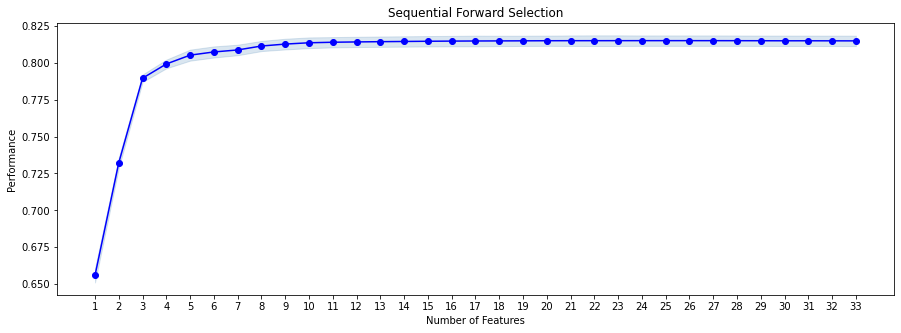

In [917]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title('Sequential Forward Selection')
plt.show()

Selecting the best 13 features

In [918]:
sfs = SFS(reg, k_features= 13, forward=True, verbose = 2, scoring='r2', n_jobs=-1)

sfs = sfs.fit(X_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  33 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.0s finished

[2023-05-04 08:24:58] Features: 1/13 -- score: 0.6558919052700134[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.4s finished

[2023-05-04 08:24:59] Features: 2/13 -- score: 0.732215876531584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.1s finished

[2023-05-04 08:25:01] Features: 3/13 -- score: 0.789535270660973[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished

[2023-05-04 08:25:02] Features: 4/13 -- score: 0.7991

In [919]:
# important features

list(sfs.k_feature_names_)

['0', '1', '2', '3', '4', '6', '7', '9', '16', '23', '26', '30', '32']

In [920]:
feat_cols = list(sfs.k_feature_idx_)

X_train2 = X_train[X_train.columns[feat_cols]]
X_test2 = X_test[X_test.columns[feat_cols]]
X_val2 = X_val[X_val.columns[feat_cols]]

In [921]:
X_train2

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,User_Count,Genre_Adventure,Genre_Misc,Genre_Sports,Rating_No rating,Platform_primary_Others,Platform_primary_PSP,Platform_primary_X360
5743,0.29,0.00,0.000,0.020,0.0,0.0,0,0,0,1,0,0,0
14604,0.03,0.00,0.000,0.000,14.0,50.0,0,0,0,0,1,0,0
13412,0.04,0.00,0.000,0.000,0.0,0.0,0,0,0,0,0,0,0
2695,0.37,0.00,0.275,0.075,47.0,30.0,0,0,0,0,0,0,0
99,0.60,0.01,0.275,0.075,0.0,0.0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.60,0.04,0.275,0.075,52.5,50.0,0,0,0,0,0,0,1
1928,0.60,0.00,0.275,0.075,44.0,50.0,0,0,1,0,0,0,0
4227,0.00,0.10,0.000,0.000,0.0,0.0,0,0,1,1,1,0,0
15434,0.00,0.00,0.020,0.000,0.0,0.0,0,1,0,1,1,0,0


In [922]:
X_test2

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,User_Count,Genre_Adventure,Genre_Misc,Genre_Sports,Rating_No rating,Platform_primary_Others,Platform_primary_PSP,Platform_primary_X360
7941,0.09,0.00,0.070,0.020,50.0,21.0,0,0,0,0,0,0,0
4711,0.20,0.00,0.160,0.050,17.0,18.0,0,0,0,0,0,0,0
6171,0.10,0.02,0.120,0.050,44.0,27.0,0,0,0,0,0,0,0
766,0.60,0.00,0.275,0.075,0.0,5.0,0,0,0,0,0,0,0
1963,0.16,0.00,0.275,0.075,32.0,32.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12348,0.03,0.00,0.020,0.010,15.0,12.0,0,0,1,0,0,0,0
2206,0.46,0.00,0.275,0.075,0.0,0.0,0,0,1,1,0,0,0
11769,0.00,0.07,0.000,0.000,0.0,0.0,1,0,0,1,0,0,0
7709,0.10,0.00,0.070,0.020,19.0,21.0,0,0,0,0,0,0,0


In [965]:
print(X_val2.columns)

Index(['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count',
       'User_Count', 'Genre_Adventure', 'Genre_Misc', 'Genre_Sports',
       'Rating_No rating', 'Platform_primary_Others', 'Platform_primary_PSP',
       'Platform_primary_X360'],
      dtype='object')


#### Rebuild the linear regression

This will answer the questions

a. Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.

c. What propelled the choice of your regressor for this task? Aptly discuss with quantitative reasons! (Because after using feature selection, this model is simple and performs)

###### X_train2 = X_train[X_train.columns[feat_cols]]
###### X_test2 = X_test[X_test.columns[feat_cols]]
###### X_val2 = X_val[X_val.columns[feat_cols]]

These are the original data that havent been normalized so we have to normalize them in the new model

In [924]:
X_train2_sd = scaler.fit_transform(X_train2)
X_test2_sd = scaler.transform(X_test2)
X_val2_sd = scaler.transform(X_val2)

In [925]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X_train2_sd, y_train)

LinearRegression()

In [926]:
linear_reg2_train = model_performance_regression(lin_reg2, X_train2_sd, y_train)
linear_reg2_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.631747,0.497602,0.814961,0.814736,84503.618416


In [927]:
linear_reg2_val = model_performance_regression(lin_reg2, X_val2_sd, y_val)
linear_reg2_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.630425,0.495887,0.811702,0.810782,104495.949026


The 13 features have well contributed to the model slightly than the whole features.

In [928]:
# Since we have assumed this is our best model, we can touch the test data now

linear_reg2_test = model_performance_regression(lin_reg2, X_test2_sd, y_test)
linear_reg2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.621663,0.489798,0.818534,0.817826,28568.406082


We can see on the test set that the performance is better than the training and validation sets.
This is not overfitting or underfitting, this is generalizing well on the best 13 features.

In [929]:
# Transpose the dataframes
linear_reg2_train_T = lin_reg_train.T
linear_reg2_val_T = lin_reg_val.T

# Set new column names for the transposed dataframes
linear_reg2_train_T.columns = ['LinReg Train']
linear_reg2_val_T.columns = ['LinReg Val']

# Concatenate the dataframes side by side
results_T = pd.concat([linear_reg2_train_T, linear_reg2_val_T], axis=1)

# Display the concatenated dataframe
results_T

,LinReg Train,LinReg Val
RMSE,0.629634,1.221366e+10
MAE,0.495566,2.361478e+08
R-squared,0.816197,-7.067573e+19
Adj. R-squared,0.815628,-7.155885e+19
MAPE,86860.097039,3.536056e+10


In [930]:
y_pred = lin_reg2.predict(X_test2_sd)

In [931]:
y_pred

array([-2.21436856, -1.18887406, -1.4018267 , ..., -2.73708748,
       -2.25591034, -2.69375877])

#### Steps to build regression models

- Load the data and clean
- Visualize the data
- Treat outliers
- Model building

a. Select all features and target to build the model

b. Split the features and target into train, validation and test sets

c. Normalize the three sets of data

d. build the regression model

- Check for performance of the model (overfitting, underfitting, generalization)
- If model overfits, try Lasso and Ridge regressions
- Pick the best model based on R2, or Adjusted R2
- After picking best model, try using fewer features (Feature Selection)
- After selection fewer features, rebuild your best model
- Check performance of the best model using the few selected features
- Finally validate your best model of the test set

### Tree-based Methods
- They are not linear methods so they don't need to satisfy the assumptions of linear regression (normality, multicollinearity, independence, no need to normalize)

- We don't need to treat outliers for the task
- We don't need to normalize
- We will directly use the X and y values. hence, we will use the original train, validation and test sets

In [932]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [933]:
rf = RandomForestRegressor(random_state=0, max_depth=5)

# We can now train the model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [934]:
rf_train = model_performance_regression(rf, X_train, y_train)
rf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.394964,0.279204,0.927675,0.927451,41676.218153


This performance is better than the other models

In [935]:
rf_val= model_performance_regression(rf, X_val, y_val)
rf_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.395958,0.277947,0.925719,0.924791,94828.96433


This model is performing a little less than the training set but it's still close. We can still improve this performance further

### Visualize the Feature Importance by Random Forest Model

In [936]:
feature_names = X_train.columns.to_list()
feature_names

['NA_Sales',
 'JP_Sales',
 'EU_Sales',
 'Other_Sales',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Genre_Adventure',
 'Genre_Fighting',
 'Genre_Misc',
 'Genre_Platform',
 'Genre_Puzzle',
 'Genre_Racing',
 'Genre_Role-Playing',
 'Genre_Shooter',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Rating_E',
 'Rating_E10+',
 'Rating_EC',
 'Rating_K-A',
 'Rating_M',
 'Rating_No rating',
 'Rating_RP',
 'Rating_T',
 'Platform_primary_Others',
 'Platform_primary_PS',
 'Platform_primary_PS2',
 'Platform_primary_PS3',
 'Platform_primary_PSP',
 'Platform_primary_Wii',
 'Platform_primary_X360']

In [937]:
importances = rf.feature_importances_
importances

array([7.08548281e-01, 1.35296303e-01, 2.77201893e-02, 1.26507788e-01,
       7.01870575e-06, 0.00000000e+00, 4.82455489e-05, 2.34895648e-06,
       0.00000000e+00, 1.24739368e-05, 9.29605135e-06, 0.00000000e+00,
       1.97660128e-07, 1.33896019e-06, 1.87055623e-06, 1.04660290e-05,
       3.38857341e-06, 5.14022658e-07, 1.33201937e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.95032143e-06, 7.10688420e-06,
       0.00000000e+00, 9.54533597e-07, 1.04313651e-03, 7.34144847e-04,
       3.82845807e-05, 0.00000000e+00, 2.37093453e-06, 0.00000000e+00,
       0.00000000e+00])

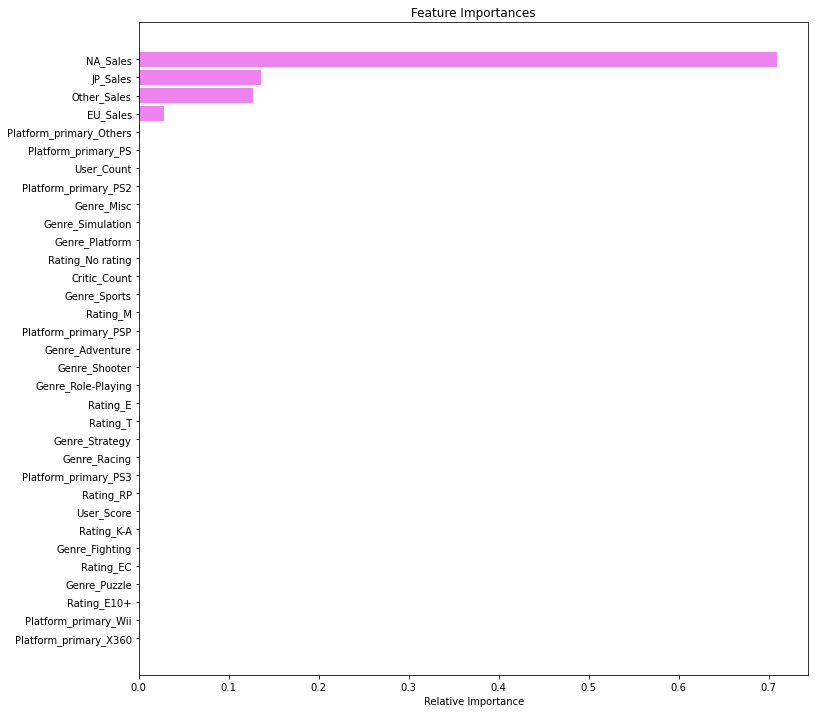

In [938]:
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting

In [939]:
gb = GradientBoostingRegressor(random_state=0, max_depth=5)

# We can now train the model
gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=0)

In [940]:
gb_train = model_performance_regression(gb, X_train, y_train)
gb_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24581,0.131846,0.971986,0.971899,28250.244545


In [941]:
gb_val= model_performance_regression(gb, X_val, y_val)
gb_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.265058,0.140864,0.966714,0.966298,28808.069363


In [942]:
# Transpose the dataframes for Random Forest and Gradient Boosting
rf_train_T = rf_train.T
rf_val_T = rf_val.T
gb_train_T = gb_train.T
gb_val_T = gb_val.T

# Set new column names for the transposed dataframes
rf_train_T.columns = ['RF Train']
rf_val_T.columns = ['RF Val']
gb_train_T.columns = ['GB Train']
gb_val_T.columns = ['GB Val']

# Concatenate the dataframes side by side
results_T_updated = pd.concat([rf_train_T, rf_val_T, gb_train_T, gb_val_T], axis=1)

# Display the concatenated dataframe
results_T_updated

,RF Train,RF Val,GB Train,GB Val
RMSE,0.394964,0.395958,0.245810,0.265058
MAE,0.279204,0.277947,0.131846,0.140864
R-squared,0.927675,0.925719,0.971986,0.966714
Adj. R-squared,0.927451,0.924791,0.971899,0.966298
MAPE,41676.218153,94828.964330,28250.244545,28808.069363


#### Visualizing Feature Importances by Gradient Boosting

In [943]:
feature_names = X_train.columns.to_list()
feature_names

['NA_Sales',
 'JP_Sales',
 'EU_Sales',
 'Other_Sales',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Genre_Adventure',
 'Genre_Fighting',
 'Genre_Misc',
 'Genre_Platform',
 'Genre_Puzzle',
 'Genre_Racing',
 'Genre_Role-Playing',
 'Genre_Shooter',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Rating_E',
 'Rating_E10+',
 'Rating_EC',
 'Rating_K-A',
 'Rating_M',
 'Rating_No rating',
 'Rating_RP',
 'Rating_T',
 'Platform_primary_Others',
 'Platform_primary_PS',
 'Platform_primary_PS2',
 'Platform_primary_PS3',
 'Platform_primary_PSP',
 'Platform_primary_Wii',
 'Platform_primary_X360']

In [944]:
importances = gb.feature_importances_
importances

array([6.86720739e-01, 1.34315002e-01, 6.36154901e-02, 1.07929296e-01,
       6.36245125e-04, 0.00000000e+00, 6.78970506e-04, 2.73278065e-04,
       5.13499130e-05, 2.41933936e-04, 6.79675535e-05, 8.18562540e-05,
       7.44013200e-05, 3.53981619e-04, 1.98245342e-04, 9.89920047e-05,
       3.44926793e-04, 2.71002984e-05, 1.44894022e-04, 1.18320703e-04,
       0.00000000e+00, 6.41215231e-05, 8.61369451e-05, 1.87329102e-04,
       4.05599872e-06, 1.59052680e-04, 1.75297971e-03, 6.19587846e-04,
       5.09848347e-04, 1.11264997e-04, 1.09350115e-04, 2.86499126e-04,
       1.36783251e-04])

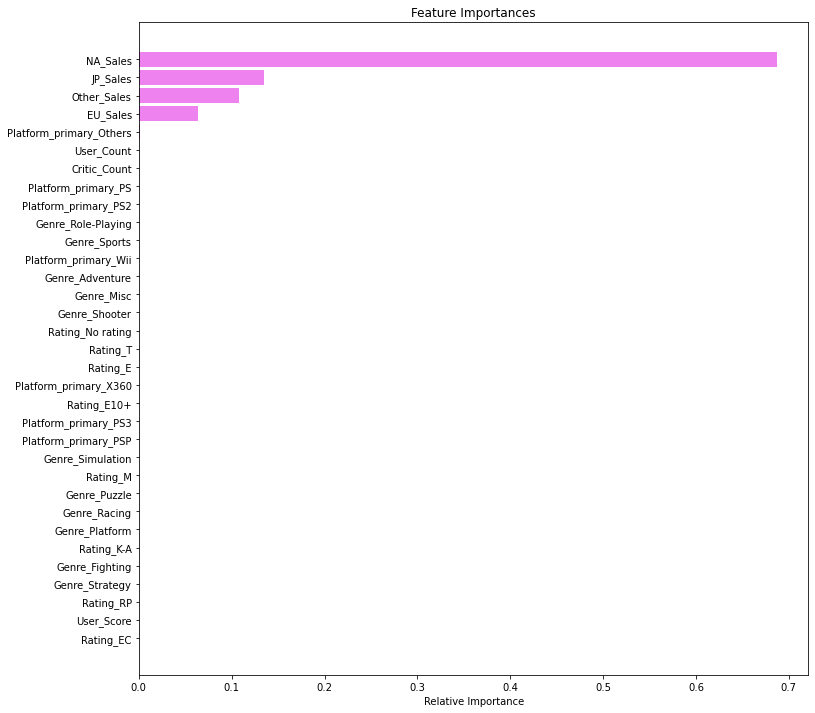

In [945]:
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Classification

Question (d)
-Train different classification models using different targets (relevant)
- We can use 

In [946]:
df['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [947]:
from collections import Counter

In [11]:
# there's one element with only one value and are too small for splitting into training, validation and testing

# Counter(y)

NOTE: If the target variable has missing values, do not attempt to impute especially when you're trying to predict, so we won't use 'Unknown'

In [949]:
# Select data based on most frequent ratings ['E', 'T', 'M', 'E10+']

new_data = data[data['Rating'].isin(['E', 'T', 'M', 'E10+'])]

In [950]:
# Sanity check

new_data['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

In [951]:
# Select features and target
X = new_data[['Genre', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Critic_Count', 'User_Score', 'User_Count', 
        'Platform_primary', 'Global_Sales']]

y = new_data['Rating'] 

In [952]:
X

,Genre,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Critic_Count,User_Score,User_Count,Platform_primary,Global_Sales
0,Sports,0.60,0.1,0.275,0.075,51.0,7.5,50.0,Wii,82.53
2,Racing,0.60,0.1,0.275,0.075,52.5,7.5,50.0,Wii,35.52
3,Sports,0.60,0.1,0.275,0.075,52.5,7.5,50.0,Wii,32.77
6,Platform,0.60,0.1,0.275,0.075,52.5,7.5,50.0,DS,29.80
7,Misc,0.60,0.1,0.275,0.075,41.0,7.5,50.0,Wii,28.92
...,...,...,...,...,...,...,...,...,...,...
16701,Puzzle,0.01,0.0,0.000,0.000,4.0,7.5,0.0,Others,0.01
16702,Puzzle,0.01,0.0,0.000,0.000,10.0,7.5,0.0,DS,0.01
16706,Strategy,0.00,0.0,0.010,0.000,12.0,7.5,13.0,Others,0.01
16708,Simulation,0.01,0.0,0.000,0.000,0.0,7.5,0.0,DS,0.01


In [953]:
X['Genre'].nunique()

12

In [12]:
# OneHotEncoding on selected features

X_new = pd.get_dummies(X, drop_first=True)
#X_new

NameError: name 'X' is not defined

In [955]:
# Encoding the target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_new = label_encoder.fit_transform(y)

In [956]:
Counter(y_new)

Counter({0: 3991, 2: 1563, 3: 2961, 1: 1420})

In [957]:
# split the data into training and testing

X_temp, X_test, y_temp, y_test = train_test_split(X_new, y_new, test_size=0.2, 
                                                  random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, 
                                                  random_state=0)

In [958]:
X_train.shape

(6358, 26)

In [959]:
X_val.shape

(1590, 26)

In [960]:
from sklearn.ensemble import RandomForestClassifier

In [961]:
# train the random forest model
rf_classifier = RandomForestClassifier(random_state=0)

# train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [962]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

#### Model Performance Check

In [968]:
# function to compute different metrics to check performance of a regression model

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class) # to compute accuracy
    recall = recall_score(target, pred_class, average='weighted') # to compute recall
    precision = precision_score(target, pred_class, average='weighted') # to compute precision
    f1 = f1_score(target, pred_class, average='weighted') # to compute F1 score
    
    # creating a dataframe of metric
    data_perf = pd.DataFrame(
        {
            'Accuracy': acc,
            'Recall': recall,
            'Precision': precision,
            'F1 score': f1
        }, 
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8,5))
    sns.heatmap(conf, annot=True, fmt='g')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()
    
    return data_perf

I will need to understand the results from the function to be able to interprete them.

C:\Users\MR EVANS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


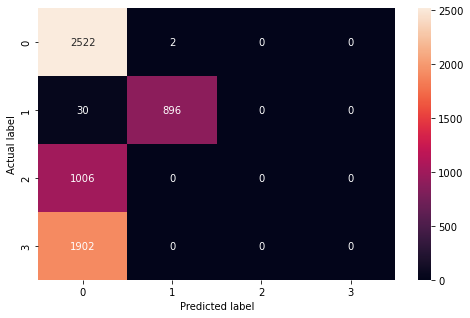

,Accuracy,Recall,Precision,F1 score
0,0.53759,0.53759,0.328686,0.393886


In [969]:
rf_train_class = model_performance_classification(rf_classifier, X_train, y_train)
rf_train_class

Recall: Out of the original ratings, the model was able to get 53.8 % correct

Precision: Out of the predictions made for the original ratings of the video game, the model was able to get only 32.9 % correct

- For the Rating[0], the model was able to get 2522 of the predictions correct
- For the Rating[1], the model was able to get 896 of the predictions correct

- 30 of the ratings belonging to Rating[1] were wrongly predicted as Rating[0]
- 1006 of ratings belonging to Rating[2] were wrongly predicted as Rating[0]
- 1902 of ratings belonging to Rating[3] were wrongly predicted as Rating[0]

We can improve the performance of the model by
- playing around max_depth
- balancing the data

In [972]:
new_data['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

30 of the ratings belonging to Rating[1] were wrongly predicted as Rating[0]

1006 of ratings belonging to Rating[2] were wrongly predicted as Rating[0]

In [973]:
# Transpose the dataframes for Random Forest and Gradient Boosting
rf_train_class_T = rf_train.T
rf_val_class_T = rf_val.T

# Set new column names for the transposed dataframes
rf_train_class_T.columns = ['RF Train']
rf_val_class_T.columns = ['RF Val']

# Concatenate the dataframes side by side
results_T_updated = pd.concat([rf_train_class_T, rf_val_class_T], axis=1)

# Display the concatenated dataframe
results_T_updated

,RF Train,RF Val
RMSE,0.394964,0.395958
MAE,0.279204,0.277947
R-squared,0.927675,0.925719
Adj. R-squared,0.927451,0.924791
MAPE,41676.218153,94828.964330


Recall: Out of the original ratings, the model was able to get 41.1 % correct

Precision: Out of the predictions made for the original ratings of the video game, the model was able to get only 23.4 % correct

- For the Rating[0], the model was able to get 615 of the predictions correct
- For the Rating[1], the model was able to get 39 of the predictions correct

- 185 of the ratings belonging to Rating[1] were wrongly predicted as Rating[0]
- 251 of ratings belonging to Rating[2] were wrongly predicted as Rating[0]
- 461 of ratings belonging to Rating[3] were wrongly predicted as Rating[0]

- The 'Recall', 'Accuracy' of the training and validation sets are 53.8 % and 41.1 % respectively which shows the model is overfitting. 
- The 'Precision' of the training and validation sets are 32.7 % and 23.4 % respectively which shows the model is overfitting. 

#### We can use this to answer Question (e)

### Model Improvement Strategy
- Balancing the data using SMOT

##### Question (f): The model can be improved using SMOT for deployment

In [974]:
!pip install imblearn

In [975]:
from imblearn.over_sampling import SMOTE

In [976]:
sm = SMOTE(random_state=0)

In [977]:
X_sm, y_sm = sm.fit_resample(X_new, y_new)

In [978]:
Counter(y_sm) 

Counter({0: 3991, 2: 3991, 3: 3991, 1: 3991})

In [979]:
# split the data into training and testing

X_temp, X_test, y_temp, y_test = train_test_split(X_sm, y_sm, test_size=0.2, 
                                                  random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, 
                                                  random_state=0)

In [980]:
# training the model
rf_class2 = RandomForestClassifier(random_state=0)

# train the model
rf_class2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

C:\Users\MR EVANS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


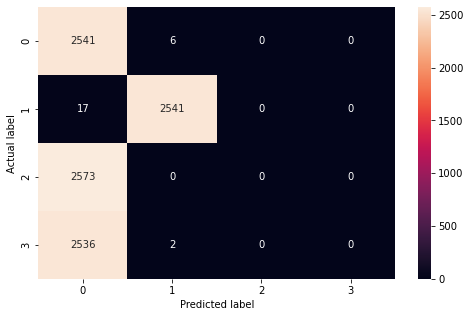

,Accuracy,Recall,Precision,F1 score
0,0.497455,0.497455,0.332234,0.373213


In [981]:
rf_train_class2 = model_performance_classification(rf_class2, X_train, y_train)
rf_train_class2

C:\Users\MR EVANS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


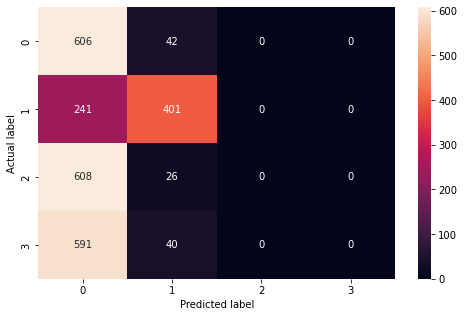

,Accuracy,Recall,Precision,F1 score
0,0.394129,0.394129,0.273076,0.289184


In [982]:
rf_val_class2 = model_performance_classification(rf_class2, X_val, y_val)
rf_val_class2

### Unsupervised Learning
- The goal is not about predicting any categories or output
- There is no target
- The goal is to group data to get insights from these groups

- It uses distance measures hence, we have to scale the data.


In [984]:
data2 = data.drop(['Name', 'Global_Sales_modified', 'Platform', 
               'Year_of_Release', 'Publisher', 'Developer'], axis = 1)

In [985]:
data2.head(5)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Platform_primary
0,Sports,0.6,0.275,0.1,0.075,82.53,76.0,51.0,7.5,50.0,E,Wii
1,Platform,0.6,0.275,0.1,0.075,40.24,0.0,0.0,7.5,0.0,No rating,Others
2,Racing,0.6,0.275,0.1,0.075,35.52,82.0,52.5,7.5,50.0,E,Wii
3,Sports,0.6,0.275,0.1,0.075,32.77,80.0,52.5,7.5,50.0,E,Wii
4,Role-Playing,0.6,0.275,0.1,0.075,31.37,0.0,0.0,7.5,0.0,No rating,Others


In [986]:
X = data2.select_dtypes(include = 'number')

In [987]:
X

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,0.60,0.275,0.10,0.075,82.53,76.0,51.0,7.5,50.0
1,0.60,0.275,0.10,0.075,40.24,0.0,0.0,7.5,0.0
2,0.60,0.275,0.10,0.075,35.52,82.0,52.5,7.5,50.0
3,0.60,0.275,0.10,0.075,32.77,80.0,52.5,7.5,50.0
4,0.60,0.275,0.10,0.075,31.37,0.0,0.0,7.5,0.0
...,...,...,...,...,...,...,...,...,...
16714,0.00,0.000,0.01,0.000,0.01,0.0,0.0,7.5,0.0
16715,0.00,0.010,0.00,0.000,0.01,0.0,0.0,7.5,0.0
16716,0.00,0.000,0.01,0.000,0.01,0.0,0.0,7.5,0.0
16717,0.01,0.000,0.00,0.000,0.01,0.0,0.0,7.5,0.0


In [988]:
# Normalize the data
scaler = StandardScaler()

X_sd = scaler.fit_transform(X)

In [989]:
X.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

#### Clustering
- We will use KMean Clustering

In [990]:
from sklearn.cluster import KMeans

In [991]:
SSE = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=1, n_init=10)
    kmeans.fit(X_sd)
    SSE.append(kmeans.inertia_)

In [993]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

pred = kmeans.fit_predict(X_sd)

In [994]:
np.unique(pred)

array([0, 1, 2])

In [995]:
# Assigning the predicted clusters to our dataframe
data2['cluster'] = pred

In [996]:
pred

array([1, 1, 1, ..., 2, 2, 2])

In [997]:
# select all numerical columns
num_col = data2.select_dtypes(include='number').columns.tolist()
num_col

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'cluster']

<bound method Figure.tight_layout of <Figure size 1440x432 with 10 Axes>>

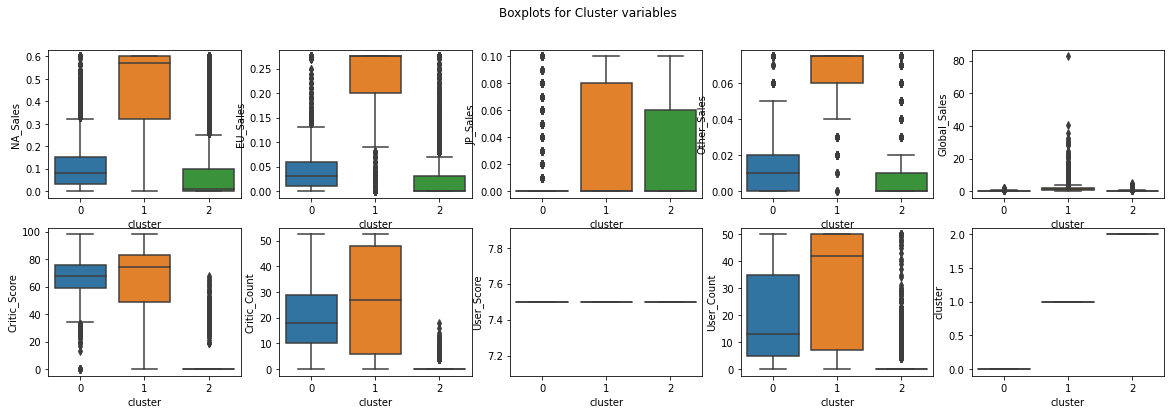

In [1021]:
num_rows = 2
num_cols = 5
fig, ax = plt.subplots(num_rows, num_cols, figsize = (20, 6))
fig.suptitle('Boxplots for Cluster variables')

count = 0

for i in range(num_rows):
    for j in range(num_cols):
        sns.boxplot(ax = ax[i,j], x = data2['cluster'], y = data2[num_col[count]])
        count += 1

fig.tight_layout

In [1012]:
data2[data2['cluster'] == 2]

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Platform_primary,cluster
215,Role-Playing,0.00,0.00,0.10,0.00,4.87,0.0,0.0,7.5,0.0,No rating,PSP,2
244,Role-Playing,0.20,0.14,0.10,0.02,4.47,0.0,0.0,7.5,0.0,No rating,PS,2
316,Role-Playing,0.10,0.00,0.10,0.00,3.87,0.0,0.0,7.5,0.0,No rating,Others,2
340,Misc,0.00,0.00,0.10,0.00,3.67,0.0,0.0,7.5,0.0,No rating,DS,2
385,Role-Playing,0.00,0.00,0.10,0.00,3.44,0.0,0.0,7.5,0.0,No rating,DS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,7.5,0.0,No rating,PS3,2
16715,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,7.5,0.0,No rating,X360,2
16716,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,7.5,0.0,No rating,PS,2
16717,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,7.5,0.0,No rating,Others,2


In [1006]:
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

# Calculate the silhouette score for the K-means clustering
sil_score = silhouette_score(X_sd, pred)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.33973796085262814


In [1011]:
# Create a crosstab of the 'Rating' variable and cluster labels
crosstab = pd.crosstab(data2['Platform_primary'], data2['cluster'])
# Perform the chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab)
print("Chi2 Stat:", chi2_stat)
print("P Value:", p_val)

Chi2 Stat: 1840.033315743788
P Value: 0.0


In [1007]:
# Create a crosstab of the 'Rating' variable and cluster labels
crosstab = pd.crosstab(data2['Rating'], data2['cluster'])
# Perform the chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab)
print("Chi2 Stat:", chi2_stat)
print("P Value:", p_val)

Chi2 Stat: 8900.203943083707
P Value: 0.0


In [1009]:
# Create a crosstab of the 'Rating' variable and cluster labels
crosstab = pd.crosstab(data2['Genre'], data2['cluster'])
# Perform the chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab)
print("Chi2 Stat:", chi2_stat)
print("P Value:", p_val)

Chi2 Stat: 1257.6259061159421
P Value: 2.1999199419675877e-252
